# Machine Learning Analysis - London Housing Data

This notebook will apply supervised ML models from scikit-learn to analyse the real estate data in ```10m_london_houses_.csv```.

Exploratory data analysis of this dataset is covered in ```EDA.ipynb```.

The goal of this notebook is to try out some simple ML models and test best ML practices using a straightforward dataset. This includes
- Apply regression models (Linear, Ridge and Lasso) to predict house prices.
- Perform k-fold cross validation.
- Evaluate model performance with all available metrics: ROC/ AUC curves, accuracy, precision, F1-score, R^2, MSE, RMSE, NMSE confusion matrices.
- Perform hyperparameter tuning with GridSearchCV and RandomSearchCV to optimize models.
- Determine the best regression model for price prediction.
- Convert categorical data to numerical data.
- Evaluate the effect of scaling/ normalization on model performance.
- Automate model building with pipelines.
- Principal component analysis - [Geeksforgeeks](https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-with-python/)

Repository link: [Github](https://github.com/rsamconn/London-housing)

In [77]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(np.NaN)

nan


In [ ]:
# Load the data
housing_df = pd.read_csv('data/10m_london_houses_.csv')

# Reminder of how the data looks
print(f"Dataset shape: {housing_df.shape}")
display(housing_df.head())

Dataset shape: (1000, 17)


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


## Planning

I will run Regression models for several different 'passes' which each use different feature datasets.

Each pass gets these steps:

1. Determine input data
2. Import, instantiate, and fit models - linear, lasso, ridge
3. Predicting target variables
4. Evaluating predictions vs. test data
5. K-fold cross validation
6. Hyperparameter tuning
7. Pipeline for best model

Afterwards I can do more advanced things - scaling, categorical -> numeric, other metrics, PCA

Input data ideas:

- First run through = only square meters
- Intermediate run = only numeric data
- Intermediate run = numeric data plus some categoric data converted to numeric - only the Neighborhood column
- Intermediate run = numeric data plus some categoric data converted to numeric - only those columns which are T/F
- Final run through = _all_ data

Other ideas: add price per square meter column, add other features?

In [ ]:
from sklearn.model_selection import train_test_split

# Import models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## Pass 1 - Only Square Meters

### 1.1 Get data

In [87]:
# Create sqm-only dataset
X_sqm = housing_df['Square Meters'].values.reshape(-1, 1)
y = housing_df['Price (£)'].values
X_train_sqm, X_test_sqm, y_train_sqm, y_test_sqm = train_test_split(X_sqm, y, test_size=0.3, random_state=24)

print(X_train_sqm.shape, X_test_sqm.shape, y_train_sqm.shape, y_test_sqm.shape)

(700, 1) (300, 1) (700,) (300,)


### 1.2 Instantiate and fit

In [88]:
# Instantiate models
linreg1 = LinearRegression()
lasso1 = Lasso(alpha = 0.1)
ridge1 = Ridge(alpha = 0.1)

# Fit to numeric data
linreg1.fit(X_train_sqm, y_train_sqm)
lasso1.fit(X_train_sqm, y_train_sqm)
ridge1.fit(X_train_sqm, y_train_sqm)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


### 1.3 Predict

In [90]:
linreg1_preds = linreg1.predict(X_test_sqm)
lasso1_preds = lasso1.predict(X_test_sqm)
ridge1_preds = ridge1.predict(X_test_sqm)

print(f'Linear predictions: {linreg1_preds.shape}')
print(f'Lasso predictions: {lasso1_preds.shape}')
print(f'Ridge predictions: {ridge1_preds.shape}')

Linear predictions: (300,)
Lasso predictions: (300,)
Ridge predictions: (300,)


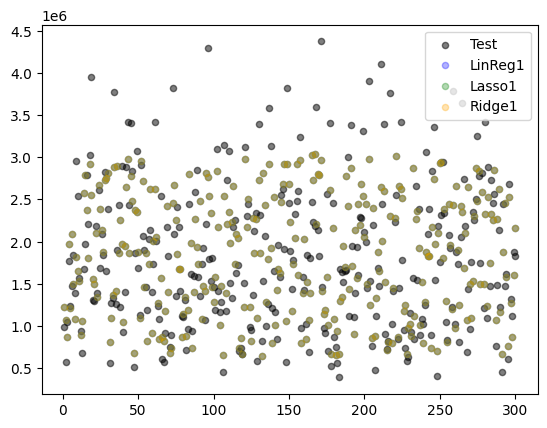

In [96]:
y_points = np.linspace(1, len(y_test_sqm), len(y_test_sqm))
# print(len(y_points))
plt.scatter(y_points, y_test_sqm, label='Test', alpha=0.5, color='black', s=20)
plt.scatter(y_points, linreg1_preds, label='LinReg1', alpha=0.3, color='blue', s=20)
plt.scatter(y_points, lasso1_preds, label='Lasso1', alpha=0.3, color='green', s=20)
plt.scatter(y_points, ridge1_preds, label='Ridge1', alpha=0.3, color='orange', s=20)
plt.legend()
plt.show()

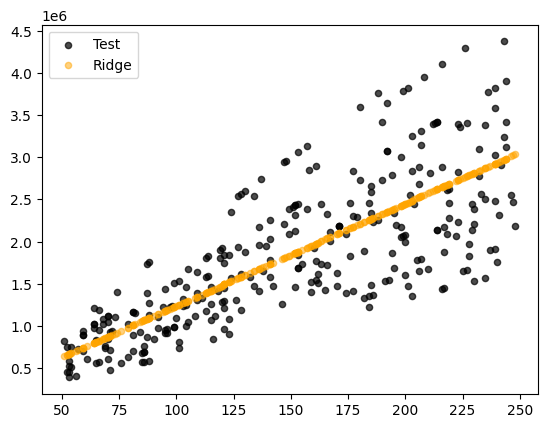

In [100]:
plt.scatter(X_test_sqm, y_test_sqm, label='Test', alpha=0.7, color='black', s=20)
# plt.scatter(X_test_sqm, linreg1_preds, label='LinReg', alpha=0.5, color='blue', s=20)
# plt.scatter(X_test_sqm, lasso1_preds, label='Lasso', alpha=0.5, color='green', s=20)
plt.scatter(X_test_sqm, ridge1_preds, label='Ridge', alpha=0.5, color='orange', s=20)
plt.legend()
plt.show()

### 1.4 Score

In [105]:
linreg1_score = linreg1.score(X_test_sqm, y_test_sqm)
lasso1_score = lasso1.score(X_test_sqm, y_test_sqm)
ridge1_score = ridge1.score(X_test_sqm, y_test_sqm)

print(f'Linear score: {linreg1_score}')
print(f'Lasso score: {lasso1_score}')
print(f'Ridge score: {ridge1_score}')

Linear score: 0.5912279998234052
Lasso score: 0.5912279999752179
Ridge score: 0.5912280024580444


### 1.5 Cross validation

## Pass 2 - Numeric data

### 2.1 Get Data

In [75]:
# Create numeric-only dataset
numeric_columns = ['Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Floors']
X_numeric = housing_df.loc[:, numeric_columns].values
y = housing_df['Price (£)'].values
X_train_numeric, X_test_numeric, y_train_numeric, y_test_numeric = train_test_split(X_numeric, y, test_size=0.3, random_state=24)

print(X_train_numeric.shape, X_test_numeric.shape, y_train_numeric.shape, y_test_numeric.shape)

(700, 5) (300, 5) (700,) (300,)


### 2.2 Import, instantiate, fit

Linear, lasso and ridge regression model

In [76]:
# Instantiate models
linreg = LinearRegression()
lasso = Lasso(alpha = 0.1)
ridge = Ridge(alpha = 0.1)

# Fit to numeric data
linreg.fit(X_train_numeric, y_train_numeric)
lasso.fit(X_train_numeric, y_train_numeric)
ridge.fit(X_train_numeric, y_train_numeric)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


### 2.3 Predict

In [79]:
y_linreg = linreg.predict(X_test_numeric)
y_lasso = lasso.predict(X_test_numeric)
y_ridge = ridge.predict(X_test_numeric)

print(f'Linear predictions: {y_linreg.shape}')
print(f'Lasso predictions: {y_lasso.shape}')
print(f'Ridge predictions: {y_ridge.shape}')

Linear predictions: (300,)
Lasso predictions: (300,)
Ridge predictions: (300,)


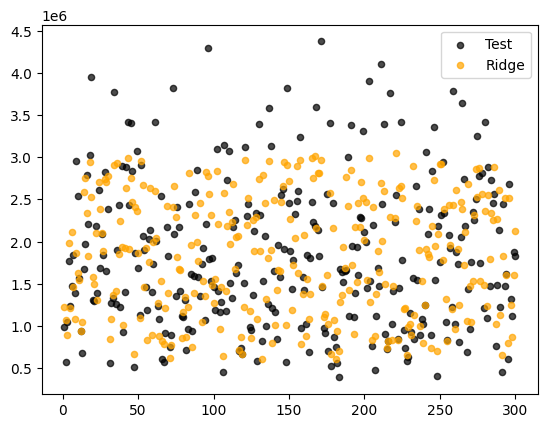

In [107]:
y_points = np.linspace(1, len(y_test_numeric), len(y_test_numeric))
# print(len(y_points))
plt.scatter(y_points, y_test_numeric, label='Test', alpha=0.7, color='black', s=20)
# plt.scatter(y_points, y_linreg, label='LinReg', alpha=0.7, color='blue', s=20)
# plt.scatter(y_points, y_lasso, label='Lasso', alpha=0.7, color='green', s=20)
plt.scatter(y_points, y_ridge, label='Ridge', alpha=0.7, color='orange', s=20)
plt.legend()
plt.show()

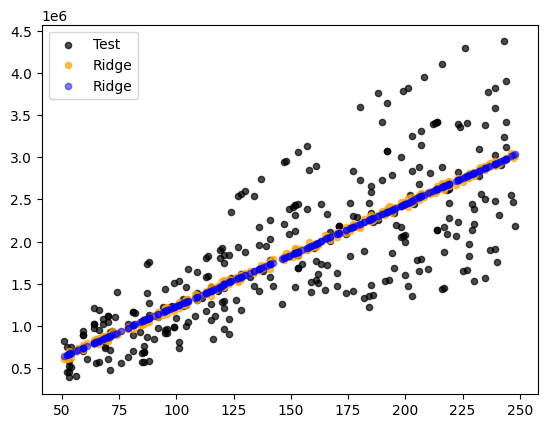

In [108]:
plt.scatter(X_test_numeric[:, 2], y_test_numeric, label='Test', alpha=0.7, color='black', s=20)
# plt.scatter(X_test_numeric[:, 2], y_linreg, label='LinReg', alpha=0.7, color='blue', s=20)
# plt.scatter(X_test_numeric[:, 2], y_lasso, label='Lasso', alpha=0.7, color='green', s=20)
plt.scatter(X_test_numeric[:, 2], y_ridge, label='Ridge', alpha=0.7, color='orange', s=20)
plt.scatter(X_test_sqm, ridge1_preds, label='Ridge', alpha=0.5, color='blue', s=20)
plt.legend()
plt.show()